# **Tugas Pra UAS**
✅ **Dataset Terpilih:** [Wine Dataset – UCI ML Repository](https://archive.ics.uci.edu/dataset/186/wine)

🎯 Deskripsi:

Dataset ini berisi hasil analisis kimia dari 3 jenis anggur (wine) yang ditanam di wilayah yang sama di Italia tetapi berasal dari 3 kultivar yang berbeda. Dataset ini cocok untuk klasifikasi dan clustering.

1. **Data Understanding**

**a. Fitur-Fitur:**

Total: 13 fitur numerik, 1 label kelas (target)

| Fitur                | Deskripsi            |
| -------------------- | -------------------- |
| Alcohol              | Kandungan alkohol    |
| Malic acid           | Kadar asam malat     |
| Ash                  | Abu hasil pembakaran |
| Alcalinity of ash    | Kealkalinan abu      |
| Magnesium            | Kandungan magnesium  |
| Total phenols        | Jumlah fenol         |
| Flavanoids           | Jumlah flavonoid     |
| Nonflavanoid phenols | Fenol nonflavonoid   |
| Proanthocyanins      | Proantosianin        |
| Color intensity      | Intensitas warna     |
| Hue                  | Warna                |
| OD280/OD315          | Rasio absorbansi     |
| Proline              | Kandungan proline    |



In [38]:
pip install ucimlrepo

In [39]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset wine
wine = fetch_ucirepo(id=186)  # ID Wine di UCI = 186

# Dataframe fitur dan target
df = wine.data.features
df['target'] = wine.data.targets
df.head()


/tmp/ipython-input-39-1355468464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = wine.data.targets


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**b. Cek Kualitas Data:**

In [40]:
# Cek missing value
print(df.info())
print(df.isnull().sum())

# Statistik dasar
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  target                6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides        

* Missing value: ❌ Tidak ada

* Outlier: ✅ Ada (pada “Proline” dan “Color intensity”)

* Data bertipe numerik: ✅ Ya

**c. Visualisasi:**
Akan disiapkan dalam bentuk:

* Korelasi antar fitur

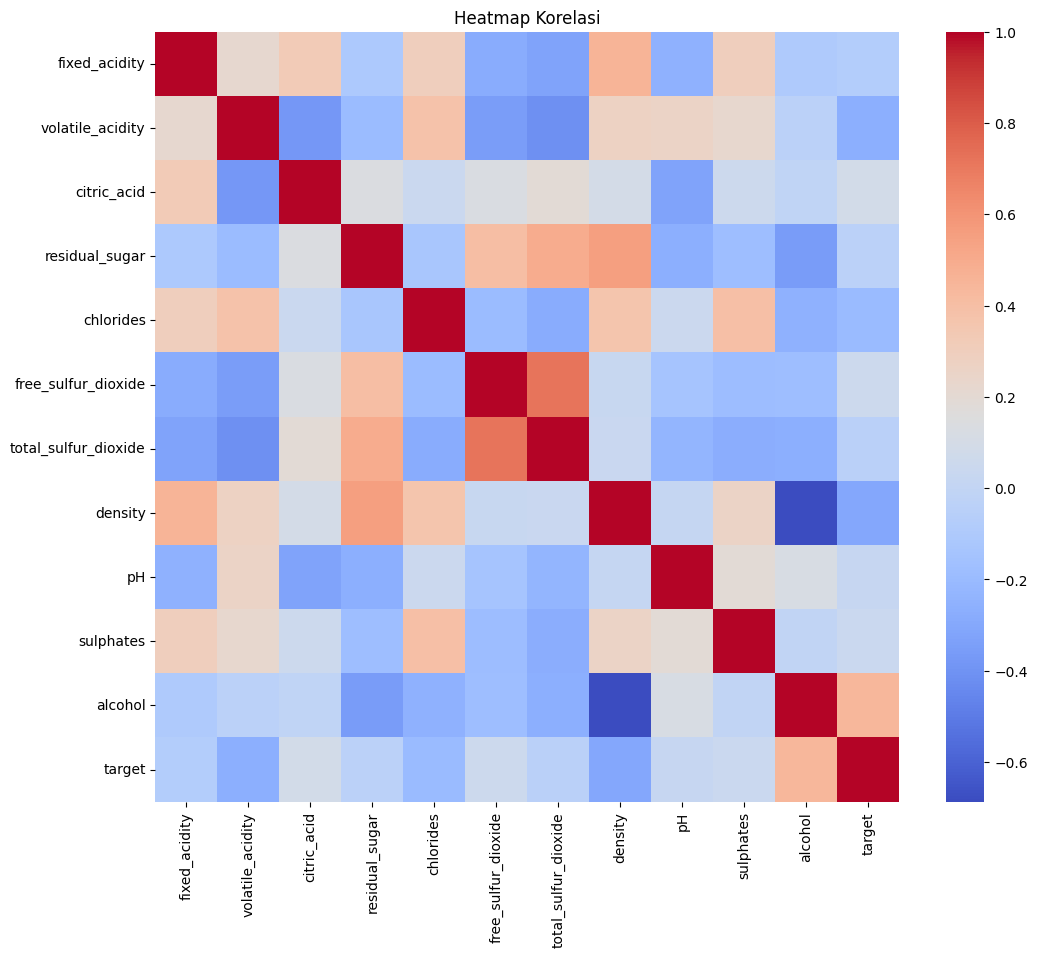

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()




*   Distribusi & Outlier (contoh: Proline dan Color Intensity)



In [42]:
print(df.columns)


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')


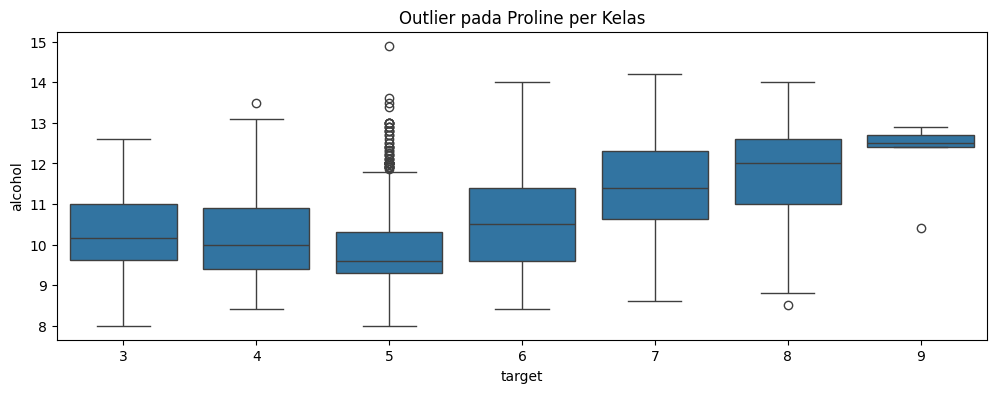

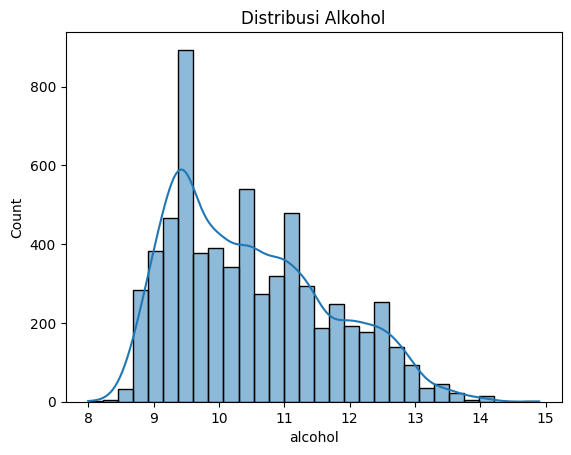

In [43]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='target', y='alcohol', data=df)
plt.title("Outlier pada Proline per Kelas")
plt.show()

sns.histplot(df['alcohol'], bins=30, kde=True)
plt.title("Distribusi Alkohol")
plt.show()


2. Preprocessing

Langkah-langkah:

* Normalisasi (StandardScaler)

* Reduksi dimensi (PCA ke 2D)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gabung ke dataframe untuk visualisasi
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y


* Visualisasi Hasil PCA



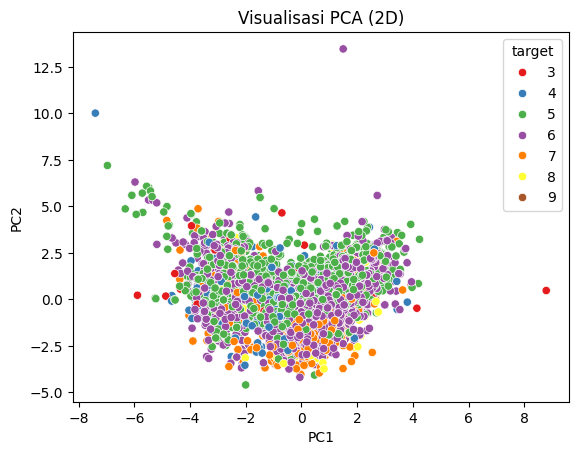

In [45]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title("Visualisasi PCA (2D)")
plt.show()


3. Clustering & Klasifikasi

Akan dilakukan:

* Clustering: KMeans (k=3)



In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

* Klasifikasi:

  * Naive Bayes



In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model_nb = GaussianNB()
model_nb.fit(X_scaled, y)
y_pred_nb = model_nb.predict(X_scaled)


  * Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_scaled, y)
y_pred_dt = model_dt.predict(X_scaled)


4. **Evaluasi Model**

* Clustering:

  * Silhouette Score

In [49]:
silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score KMeans: {silhouette:.3f}")

Silhouette Score KMeans: 0.235


* Klasifikasi:

  * Confusion Matrix

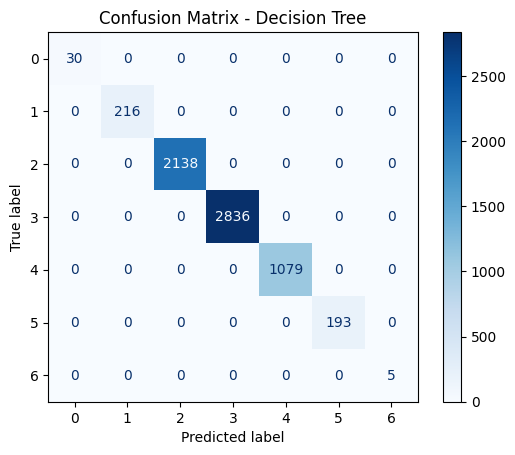

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


  * Accuracy

  * Precision & Recall

In [51]:
print("=== Naive Bayes Classification Report ===")
print(classification_report(y, y_pred_nb))

print("=== Decision Tree Classification Report ===")
print(classification_report(y, y_pred_dt))

=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           3       0.11      0.20      0.14        30
           4       0.15      0.13      0.14       216
           5       0.53      0.58      0.55      2138
           6       0.50      0.39      0.44      2836
           7       0.36      0.56      0.43      1079
           8       0.30      0.05      0.08       193
           9       0.13      0.40      0.20         5

    accuracy                           0.46      6497
   macro avg       0.30      0.33      0.28      6497
weighted avg       0.47      0.46      0.45      6497

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00      2138
           6       1.00      1.00      1.00      2836
           7       1.00      1.00      1.00   